### pip install "numpy<2.0"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


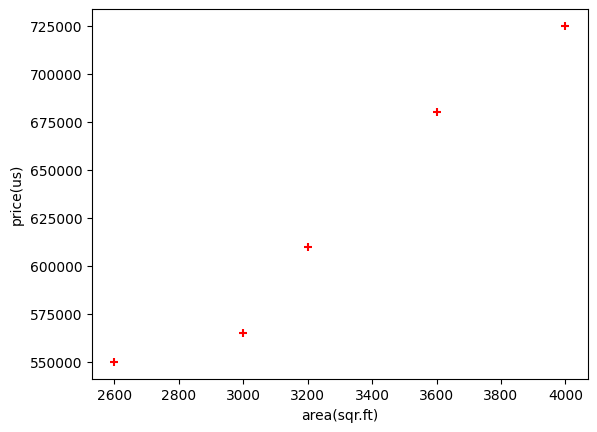

In [3]:
%matplotlib inline


plt.xlabel('area(sqr.ft)')
plt.ylabel('price(us)')
plt.scatter(df.area,df.price, color='red',marker='+')


In [4]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [5]:
reg.predict([[5000]])


C:\Users\chaub\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [6]:
reg.coef_
#slope

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:

135.78767123*5000 + 180616.43835616432

859554.7945061643

In [9]:
area_df = pd.read_csv("areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [10]:
p=reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [11]:
#new colom price
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [12]:
area_df.to_csv('house prediction.csv')

In [13]:
import pickle

In [14]:
with open("model_pickle","wb") as file:
    pickle.dump(reg,file)

In [15]:
with open("model_pickle","rb") as f:
    mp= pickle.load(f)

In [16]:
mp.coef_

array([135.78767123])

In [17]:
mp.intercept_

180616.43835616432

In [18]:
mp.predict([[4058]])

C:\Users\chaub\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([731642.80821918])

***FOr large numpy array use joblift***

In [20]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import joblib


In [22]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [44]:
mj= joblib.load('model_joblib')

In [46]:
mj.coef_

array([135.78767123])

In [48]:
mj.intercept_

180616.43835616432

In [52]:
mj.predict([[5000]])

C:\Users\chaub\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])